In [13]:
from Fonctions_DAVAL_GOUILLARDON import *

In [14]:
def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace=True):
    axis, listDataRandom, listDataSorted, listDataInvertedSorted, listDataPartiallySorted, listDataWithDuplicates = create_data(nlist, nval)

    # Stockage des résultats pour les nouveaux cas
    toplotRandom = []
    toplotSorted = []
    toplotInverted = []
    toplotPartial = []
    toplotDuplicates = []

    # Duplication des données pour préserver les listes originales
    dataTestRandom = copy.deepcopy(listDataRandom)
    dataTestSorted = copy.deepcopy(listDataSorted)
    dataTestInverted = copy.deepcopy(listDataInvertedSorted)
    dataTestPartial = copy.deepcopy(listDataPartiallySorted)
    dataTestDuplicates = copy.deepcopy(listDataWithDuplicates)

    # Boucle sur les tailles d'axes
    for i in range(len(axis)):
        # Mesure des temps pour chaque cas
        for dataType, toplot, dataTest in [
            (dataTestRandom, toplotRandom, dataTestRandom),
            (dataTestSorted, toplotSorted, dataTestSorted),
            (dataTestInverted, toplotInverted, dataTestInverted),
            (dataTestPartial, toplotPartial, dataTestPartial),
            (dataTestDuplicates, toplotDuplicates, dataTestDuplicates)
        ]:
            time1 = time.time()
            if surplace:
                fct_tri(dataTest[i])
            else:
                dataTest[i] = fct_tri(dataTest[i])
            time2 = time.time()
            toplot.append(time2 - time1)

    # Tracé des résultats pour chaque type de données
    plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    plt.plot(axis, toplotSorted, '--' + 'b', label=nom + ' (sorted)')
    plt.plot(axis, toplotInverted, ':' + 'g', label=nom + ' (inverted)')
    plt.plot(axis, toplotPartial, '-.' + 'y', label=nom + ' (partial)')
    plt.plot(axis, toplotDuplicates, ':' + color, label=nom + ' (duplicates)')
    plt.legend()
    plt.show()

# fonction mettant en concurrence une liste de fonctions de tri, pour un type de données (tableau random, trié, inversé, partiellement trié, avec doublons)
def executerTriConcurrence(liste_fct_tri, liste_noms, liste_couleurs=['r', 'y', 'g', 'b', 'm','c'], nlist=15, nval=200, surplace=True, liste=['random', 'sorted', 'inverted', 'partial', 'duplicates']):
    axis, listDataRandom, listDataSorted, listDataInvertedSorted, listDataPartiallySorted, listDataWithDuplicates = create_data(nlist, nval)

    # Stockage des résultats pour les nouveaux cas
    toplot = {case: [[] for _ in range(len(liste_fct_tri))] for case in liste}

    # Duplication des données pour préserver les listes originales
    dataTest = {
        'random': [copy.deepcopy(listDataRandom) for _ in range(len(liste_fct_tri))],
        'sorted': [copy.deepcopy(listDataSorted) for _ in range(len(liste_fct_tri))],
        'inverted': [copy.deepcopy(listDataInvertedSorted) for _ in range(len(liste_fct_tri))],
        'partial': [copy.deepcopy(listDataPartiallySorted) for _ in range(len(liste_fct_tri))],
        'duplicates': [copy.deepcopy(listDataWithDuplicates) for _ in range(len(liste_fct_tri))]
    }
    liste_symboles = {'random':'-', 'sorted':'--','inverted':':','partial': '-.','duplicates': '-'}

    # Boucle sur les tailles d'axes
    for i in range(len(axis)):
        # Mesure des temps pour chaque cas
        for case in liste:
            for j in range(len(liste_fct_tri)):
                time1 = time.time()
                if surplace:
                    liste_fct_tri[j](dataTest[case][j][i])
                else:
                    dataTest[case][j][i] = liste_fct_tri[j](dataTest[case][j][i])
                time2 = time.time()
                toplot[case][j].append(time2 - time1)

    # Tracé des résultats pour chaque type de données
    for case in liste:
        for i in range(len(liste_fct_tri)):
            plt.plot(axis, toplot[case][i], liste_symboles[case] + liste_couleurs[i], label=liste_noms[i] + ' (' + case + ')')
    plt.legend()
    plt.show()


In [15]:
def bubble_sort(A):
    n = len(A)

    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            if A[j]>A[j+1]:            
                t = A[j]
                A[j]=A[j+1]
                A[j+1] = t
                flag = 1

        if flag == 0:
            break
    return A

def bubble_sort_optimized(A):
    n = len(A)
    while n > 1:
        newn = 0
        for i in range(1, n):
            if A[i-1] > A[i]:
                # Échange des éléments
                A[i-1], A[i] = A[i], A[i-1]
                # Mise à jour de la position du dernier échange
                newn = i
        # Réduction de la portée du tri à la dernière position échangée
        n = newn
    return A

def bubble_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            cpt_comp += 1
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]
                flag = 1
                cpt_swap += 1
        if flag == 0:
            break
    return A, cpt_comp, cpt_swap



In [16]:
def selection_sort(A):
    n = len(A)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if A[j] < A[min_idx]:
                min_idx = j
        if min_idx != i:
            t = A[i]
            A[i] = A[min_idx]
            A[min_idx] = t
    return A

def selection_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            cpt_comp += 1  # comparaison entre A[j] et A[min_idx]
            if A[j] < A[min_idx]:
                min_idx = j
        if min_idx != i:
            A[i], A[min_idx] = A[min_idx], A[i]
            cpt_swap += 1  # permutation
    return A, cpt_comp, cpt_swap


In [17]:
def insertion_sort(A):
    n = len(A)
    for i in range(1, n):
        key = A[i]
        j = i - 1
        while j >= 0 and A[j] > key:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key
    return A

def insertion_sort_with_stats(A):
    n = len(A)
    cpt_comp = 0  # compteur de comparaisons
    cpt_swap = 0  # compteur de permutations
    for i in range(1, n):
        x = A[i]
        j = i - 1
        while j >= 0 and A[j] > x:
            cpt_comp += 1  # comparaison entre A[j] et x
            A[j + 1] = A[j]  # décalage à droite
            j -= 1
            cpt_swap += 1  # décalage est considéré comme un "swap"
        A[j + 1] = x
        if j >= 0:  # Pour compter la dernière comparaison
            cpt_comp += 1
    return A, cpt_comp, cpt_swap


# Comparaisons des Algorithmes de tri

## Les algorithmes de compléxité quadratique

Pour comparer ce qui est comparable, mettons en concurrence des algorithmes à la compléxité similaire

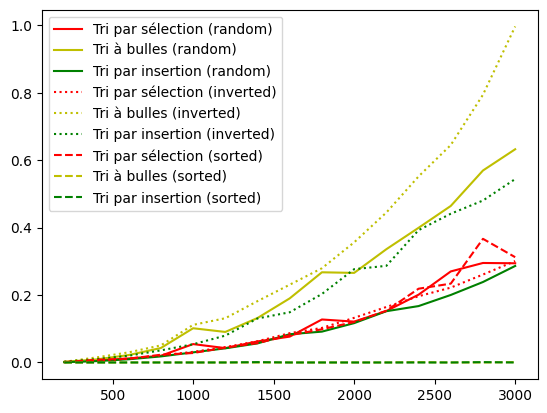

In [18]:
executerTriConcurrence([selection_sort,bubble_sort_optimized,insertion_sort], ['Tri par sélection','Tri à bulles','Tri par insertion'], ['r', 'y', 'g', 'b'], nlist=15, nval=200, surplace=True, liste=['random', 'inverted', 'sorted'])

In [19]:
executerTriConcurrence([merge_sort,quick_sort,heap_sort], ['Tri fusion','Tri rapide','Tri par tas'], ['r', 'y', 'g', 'b'], nlist=20, nval=1000, surplace=True, liste=['random'])

NameError: name 'quick_sort' is not defined

In [ ]:
executerTriConcurrence([merge_sort,heap_sort], ['Tri fusion','Tri par tas'], ['r', 'y', 'g', 'b'], nlist=15, nval=4000, surplace=True, liste=['inverted', 'sorted','duplicates'])